<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/Chap3_Reuter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#데이터 로드
#reuters 로이터 뉴스 기사를 46개의 토픽으로 분류하는 다중 분류 문제(multiclass classification) 
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #데이터에서 자주 등장하는 단어 10000개로 제한 

print(len(train_data))
print(len(test_data))

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step
8982
2246


In [2]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [3]:
#데이터 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
#i-3 을 하는 이유는 0,1,2 는 패딩,' 문서시작','사전에 없음'을 위한 인덱스 임으로 3을 뺌


557056/550378 [==============================] - 0s 0us/step


In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
train_labels[10]
# 샘플과 연결된 레이블은 토픽의 인덱스로 0~45 사이의 정수 : 46개의 토픽 분류

3

In [0]:
# 데이터 -> 벡터
import numpy as np

def vectorize_sequences(sequences, dimenstion = 10000):
  results = np.zeros((len(sequences), dimenstion))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
    
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# one-hot ending 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
#모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) 
# 레이블이 총 46개로 나타나야 하기 때문에 각 입력 샘플마다 46개 출력 클래스에 대한 확률 분포 출력

In [0]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
#검증세트 준비하기
x_val = x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 189us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7200 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.4445 - acc: 0.6884 - val_loss: 1.3450 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 170us/step - loss: 1.0945 - acc: 0.7652 - val_loss: 1.1705 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.8690 - acc: 0.8160 - val_loss: 1.0798 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.7026 - acc: 0.8475 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5652 - acc: 0.8805 - val_loss: 0.9405 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4568 - acc: 0.9052 - val_loss: 0.9089 - val_acc: 0.8020


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


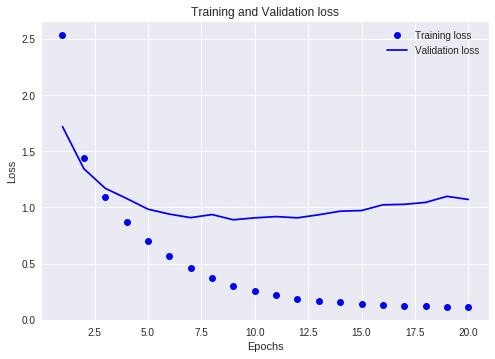

In [13]:
#훈련 과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1 )

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

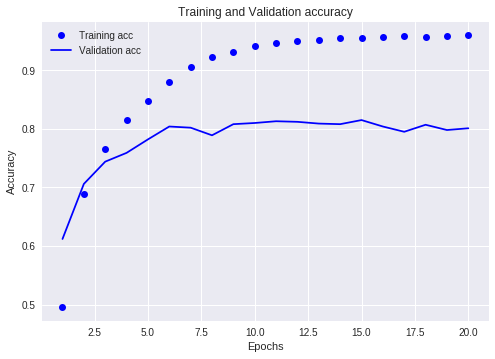

In [14]:
#훈련과 검증 정확도 그리기
plt.clf()

acc= history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
#overfitting 해결 하여 모델링

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) 


model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 188us/step - loss: 2.5359 - acc: 0.5224 - val_loss: 1.6820 - val_acc: 0.6500
Epoch 2/8
7982/7982 [==============================] - 1s 177us/step - loss: 1.3761 - acc: 0.7114 - val_loss: 1.2801 - val_acc: 0.7190
Epoch 3/8
7982/7982 [==============================] - 1s 184us/step - loss: 1.0180 - acc: 0.7783 - val_loss: 1.1316 - val_acc: 0.7510
Epoch 4/8
7982/7982 [==============================] - 1s 181us/step - loss: 0.8022 - acc: 0.8241 - val_loss: 1.0530 - val_acc: 0.7570
Epoch 5/8
7982/7982 [==============================] - 1s 175us/step - loss: 0.6431 - acc: 0.8624 - val_loss: 0.9742 - val_acc: 0.7940
Epoch 6/8
7982/7982 [==============================] - 1s 172us/step - loss: 0.5157 - acc: 0.8924 - val_loss: 0.9101 - val_acc: 0.8130
Epoch 7/8
7982/7982 [==============================] - 1s 172us/step - loss: 0.4159 - acc: 0.9138 - val_loss: 0.8953 - val_acc: 0.8210
Epoch 8

[0.9833516331517261, 0.7845057880676759]

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [17]:
#새로운 데이터 예측
predictions = model.predict(x_test)
predictions

array([[3.33779863e-05, 7.71408304e-05, 5.24580391e-05, ...,
        7.56145309e-05, 9.12353698e-06, 1.52437115e-05],
       [2.43695383e-03, 3.93767329e-03, 1.22124227e-02, ...,
        7.36626214e-04, 1.21413577e-05, 2.33021812e-04],
       [3.76585335e-03, 5.95024586e-01, 1.07161636e-02, ...,
        2.85716786e-04, 2.42369086e-03, 2.59688793e-04],
       ...,
       [3.14255703e-05, 2.44387047e-04, 9.57084485e-05, ...,
        2.30610949e-05, 1.69932202e-04, 2.40904337e-05],
       [9.79969162e-04, 3.11103892e-02, 2.76273582e-03, ...,
        4.98222129e-04, 3.96285381e-04, 2.24845542e-04],
       [2.49704416e-03, 4.41129804e-01, 7.82287773e-03, ...,
        1.03959392e-04, 7.22146826e-04, 2.07724253e-04]], dtype=float32)

In [18]:
predictions[0].shape

(46,)

In [19]:
np.sum(predictions[0])

1.0000001

In [20]:
np.argmax(predictions[0])

3

## 레이블 인코딩하는 다른 방법 : 정수 텐서로 변환 


y_train = np.array(train_labels)

y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',

             loss = 'sparse_categorical_crossentropy', 
             # 정수레이블을 사용할 경우 loss 함수에는 sparse_categorical_crossentropy를 사용해야함
             metrics = ['accuracy'])
